In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as dates
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [35]:
data_store_train = pd.read_csv('data_store_train.csv')
data_store_test = pd.read_csv('data_store_test.csv')
data_store_train = data_store_test.append(data_store_train, ignore_index= True)

In [36]:
data_store_train

,date,store_id,sale
0,2016-01-01,3,1711
1,2016-01-14,3,2016
2,2016-02-24,3,2021
3,2016-01-06,3,2024
4,2016-01-13,3,2042
...,...,...,...
19125,2014-10-05,2,8880
19126,2015-03-08,2,8904
19127,2015-08-16,2,8979
19128,2014-08-24,2,8996


In [37]:

data_example = data_store_train[data_store_train['store_id']==0]\
    .sort_values(by=['date'])[['date', 'sale']]\
    .reset_index(drop=True)
data_example.head(5)


,date,sale
0,2011-01-29,4337
1,2011-01-30,4155
2,2011-01-31,2816
3,2011-02-01,3051
4,2011-02-02,2630


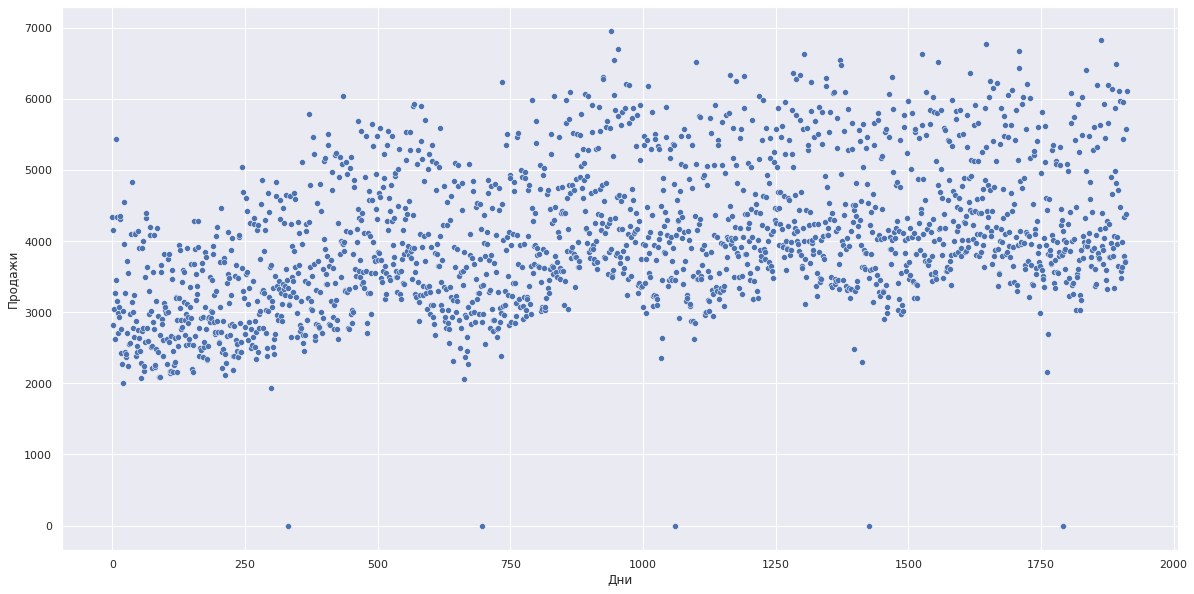

In [38]:
fig = plt.figure(figsize=(20, 10))

plot = sns.scatterplot(
    x=range(0, data_example.shape[0]),
    y=data_example['sale'].to_numpy()
)
plot.set_xlabel('Дни')
plot.set_ylabel('Продажи')

plt.show()

In [39]:
data_store_train.date = pd.to_datetime(data_store_train.date)

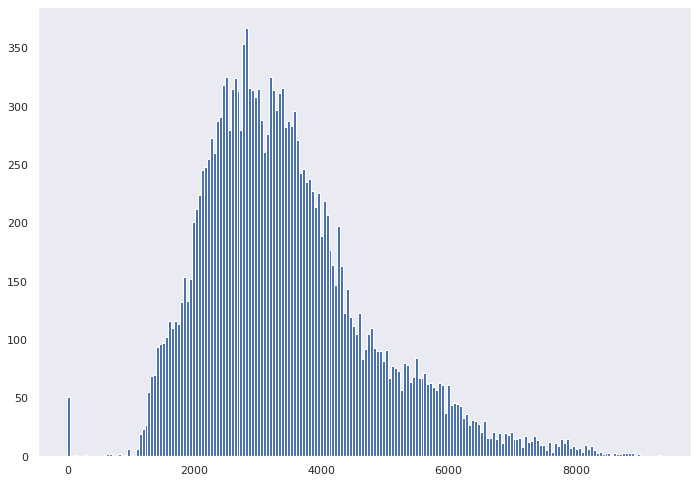

In [40]:
data_store_train.sale.hist(bins=200, grid=False, );

In [41]:
data_store_train.isna().sum()

date        0
store_id    0
sale        0
dtype: int64

In [42]:
data_store_train.describe()

,store_id,sale
count,19130.000000,19130.000000
mean,4.500000,3434.156247
std,2.872356,1313.723126
min,0.000000,0.000000
25%,2.000000,2506.250000
50%,4.500000,3228.000000
75%,7.000000,4091.000000
max,9.000000,9338.000000


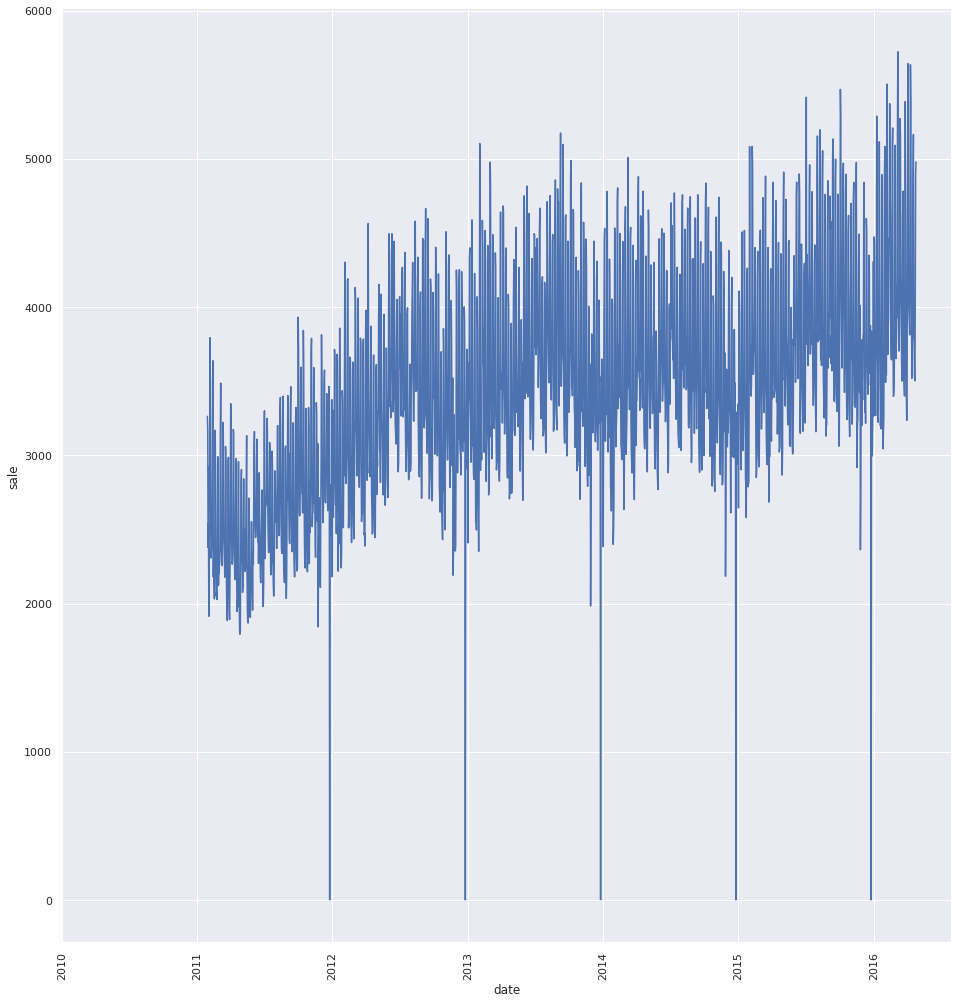

In [43]:
group_by_year = data_store_train.groupby(data_store_train.date)
figure = sns.relplot(data=group_by_year.sale.aggregate('mean'), kind='line')
figure.set_xticklabels(rotation=90)
figure.fig.set_size_inches(15,15);

In [44]:
data_store_train.loc[data_store_train['sale'] <100]

,date,store_id,sale
1150,2012-12-25,5,0
1151,2013-12-25,0,0
1152,2014-12-25,2,0
1153,2012-12-25,4,0
1154,2011-12-25,9,0
1155,2011-12-25,3,0
1156,2014-12-25,3,0
1157,2014-12-25,4,0
1158,2011-12-25,5,0
1159,2011-12-25,4,0


In [45]:
cleaned_data = data_store_train[data_store_train.sale > 100]

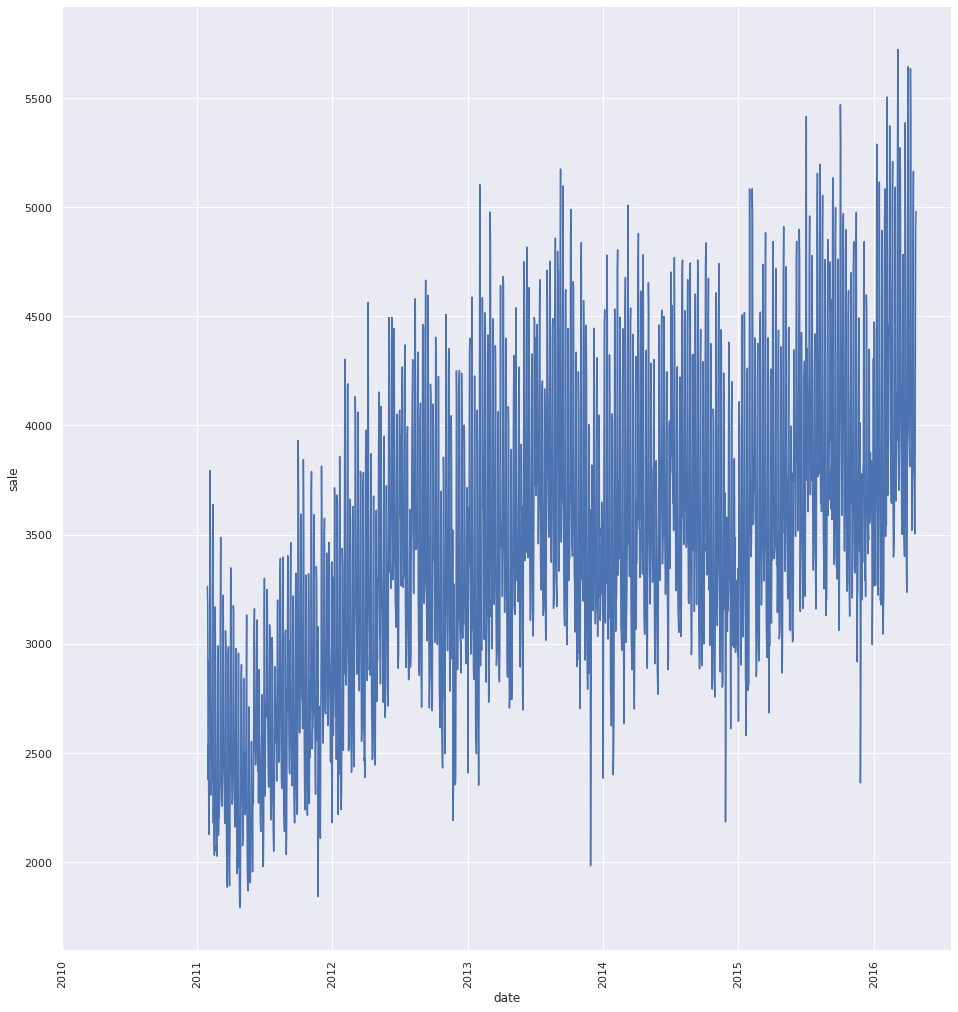

In [46]:
group_by_year = cleaned_data.groupby(cleaned_data.date)
figure = sns.relplot(data=group_by_year.sale.aggregate('mean'), kind='line')
figure.set_xticklabels(rotation=90)
figure.fig.set_size_inches(15,15);

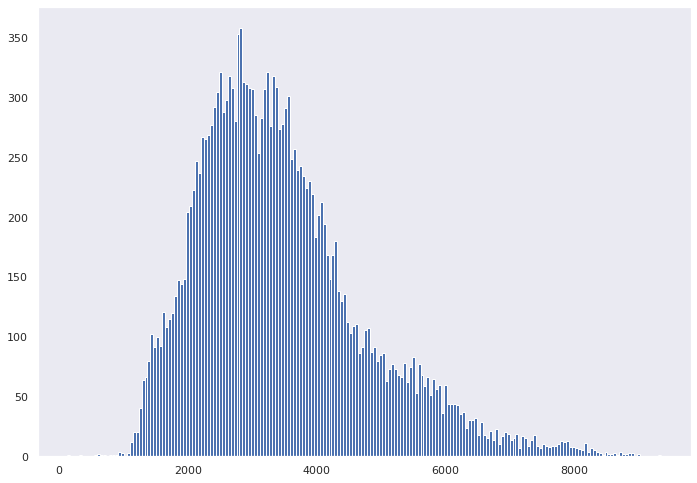

In [47]:
cleaned_data.sale.hist(bins=200, grid=False, );

In [48]:
def preprocessor(data_to_preprocess):
    new_df = pd.to_datetime(data_to_preprocess['date'])
    new_df = new_df.rename('day')
    new_df = new_df.apply(lambda x: x.day)
    data_to_preprocess = pd.concat([data_to_preprocess, new_df], axis=1)
    new_df = pd.to_datetime(data_to_preprocess['date'])
    new_df = new_df.rename('w_day')
    new_df = new_df.apply(lambda x: x.day_name())
    data_to_preprocess = pd.concat([data_to_preprocess, new_df], axis=1)
    new_df = pd.to_datetime(data_to_preprocess['date'])
    new_df = new_df.rename('month')
    new_df = new_df.apply(lambda x: x.month)
    data_to_preprocess = pd.concat([data_to_preprocess, new_df], axis=1)
    new_df = pd.to_datetime(data_to_preprocess['date'])
    new_df = new_df.rename('year')
    new_df = new_df.apply(lambda x: x.year)
    data_to_preprocess = pd.concat([data_to_preprocess, new_df], axis=1)
    return data_to_preprocess

In [49]:
cleaned_data = preprocessor(cleaned_data)
cleaned_data

,date,store_id,sale,day,w_day,month,year
0,2016-01-01,3,1711,1,Friday,1,2016
1,2016-01-14,3,2016,14,Thursday,1,2016
2,2016-02-24,3,2021,24,Wednesday,2,2016
3,2016-01-06,3,2024,6,Wednesday,1,2016
4,2016-01-13,3,2042,13,Wednesday,1,2016
...,...,...,...,...,...,...,...
19125,2014-10-05,2,8880,5,Sunday,10,2014
19126,2015-03-08,2,8904,8,Sunday,3,2015
19127,2015-08-16,2,8979,16,Sunday,8,2015
19128,2014-08-24,2,8996,24,Sunday,8,2014


In [50]:
def data_to_vector(data_to_preprocess):
    params = ['day', 'w_day', 'month', 'year', 'store_id']
    for i in params:
        day_to_vector = LabelBinarizer()
        day_to_vector.fit(data_to_preprocess[i])
        transformed = day_to_vector.transform(data_to_preprocess[i])
        new_df = pd.DataFrame(transformed)
        data_to_preprocess = pd.concat([data_to_preprocess, new_df], axis=1).drop([i], axis=1)
        data_to_preprocess = data_to_preprocess.dropna()
    return data_to_preprocess

In [51]:
cleaned_data = data_to_vector(cleaned_data)
cleaned_data

,date,sale,0,1,2,3,4,5,6,7,...,0,1,2,3,4,5,6,7,8,9
0,2016-01-01,1711.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-14,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-02-24,2021.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-06,2024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-01-13,2042.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18870,2013-07-13,7117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18871,2014-07-10,7121.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18872,2013-07-06,7123.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18873,2012-01-08,7124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
cleaned_data = cleaned_data.sort_values('date')
Train = cleaned_data[cleaned_data.date.dt.year <2016]
del Train['date']

In [59]:
Test = cleaned_data[cleaned_data.date.dt.year == 2016]
del Test['date']

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
Y_train = Train['sale']
del Train['sale']
X_train = Train
Y_test = Test['sale']
del Test['sale']
X_test = Test

In [62]:
from sklearn.preprocessing import StandardScaler


In [63]:
scaler = StandardScaler()
Y_scaled_train = scaler.fit_transform(pd.DataFrame(Y_train))
Y_scaled_train= pd.DataFrame(Y_scaled_train)
Y_scaled_test = scaler.fit_transform(pd.DataFrame(Y_test))
Y_scaled_test= pd.DataFrame(Y_scaled_test)

In [86]:
model = LinearRegression(fit_intercept=False)
model.fit(X_train, Y_scaled_train)

LinearRegression(fit_intercept=False)

In [87]:
predicted_data = model.predict(X_test)
mean_squared_error(predicted_data, Y_scaled_test)

4.9882341341990825e+23

In [69]:
import xgboost as xgb
X_test.columns =[item for item in range(0, len(X_test.columns))]
X_train.columns =  [item for item in range(0, len(X_test.columns))]
boost_train = xgb.DMatrix(X_train, Y_scaled_train)
boost_test = xgb.DMatrix(X_test)
params = {'objective': 'reg:squarederror'}
cv = xgb.cv(params, boost_train, metrics = ('rmse'), verbose_eval=False, nfold=10, show_stdv=False, num_boost_round=1000)
bst = xgb.train(params, boost_train, num_boost_round=cv['test-rmse-mean'].argmin())
prediction_train = bst.predict(boost_train)
prediction_test = bst.predict(boost_test)

In [88]:
mean_squared_error(prediction_test, Y_scaled_test)

0.2236344398608368

In [89]:
predicted_data = model.predict(X_test)
mean_squared_error(predicted_data, Y_scaled_test)

4.9882341341990825e+23

In [72]:
X_test.columns =[item for item in range(0, len(X_test.columns))]


boost_test = xgb.DMatrix(X_test)
prediction_test = bst.predict(boost_test)
mean_squared_error(prediction_test, Y_scaled_test)

0.2236344398608368

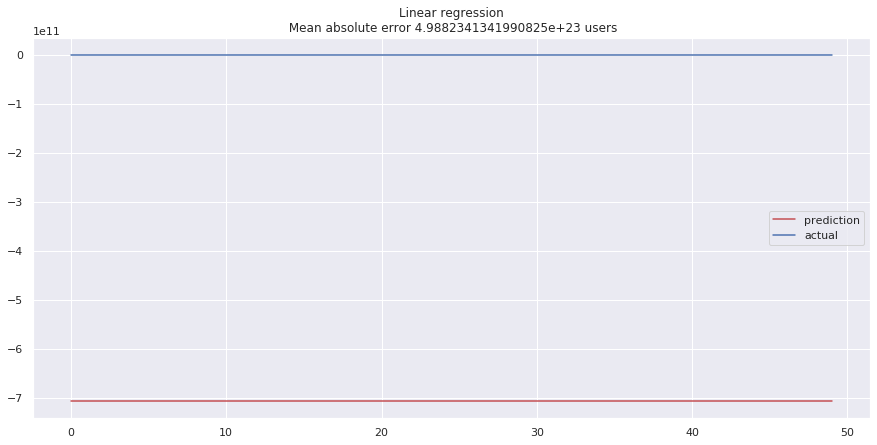

In [90]:
plt.figure(figsize=(15, 7))
plt.plot(predicted_data[:50] , "r", label="prediction")
plt.plot(Y_scaled_test[:50].values, label="actual")
plt.legend(loc="best")
plt.title("Linear regression\n Mean absolute error {} users".format(round(mean_squared_error(predicted_data, Y_scaled_test))))
plt.grid(True);

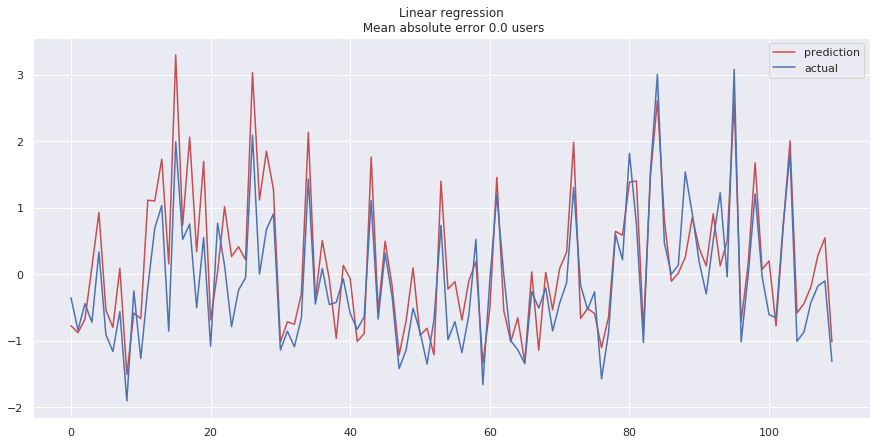

In [83]:
plt.figure(figsize=(15, 7))
plt.plot(prediction_test[:110] , "r", label="prediction")
plt.plot(Y_scaled_test[:110].values, label="actual")
plt.legend(loc="best")
plt.title("Linear regression\n Mean absolute error {} users".format(round(mean_squared_error(prediction_test, Y_scaled_test))))
plt.grid(True);

In [82]:
from sklearn.metrics import r2_score
r2_score(prediction_test, Y_scaled_test)

0.7473583799372914